# Exemplo 1: Vestibular

In [1]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

## 1.1.Base de dados

In [4]:
# Importando os dados

df = pd.read_excel('datasets/Vestibular.xlsx')

In [5]:
#%% Visualizando os dados e cada uma das variáveis

print(df, "\n")

print(df.info())

     estudante  matemática  física  química
0     Gabriela         3.7     2.7      9.1
1  Luiz Felipe         7.8     8.0      1.5
2     Patrícia         8.9     1.0      2.7
3       Ovídio         7.0     1.0      9.0
4       Leonor         3.4     2.0      5.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudante   5 non-null      object 
 1   matemática  5 non-null      float64
 2   física      5 non-null      float64
 3   química     5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 288.0+ bytes
None


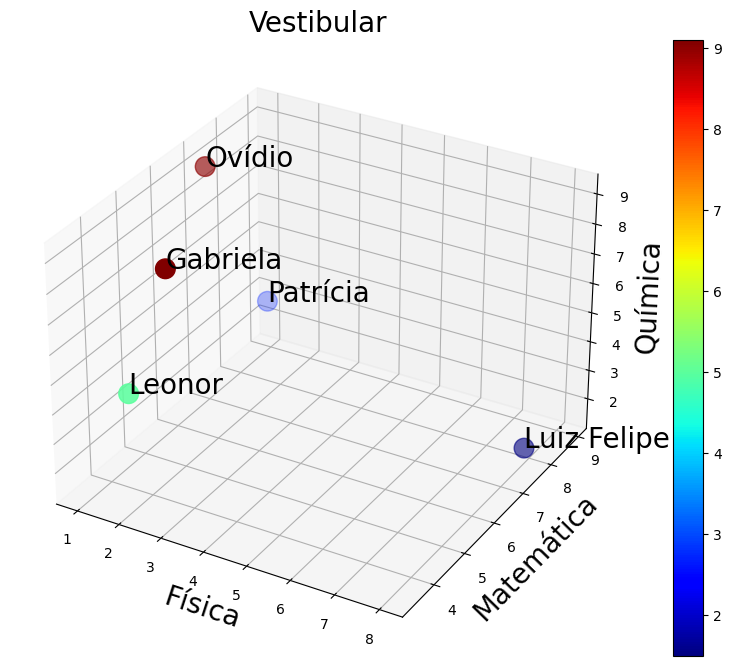

In [13]:
# Gráfico 3D com scatter

from mpl_toolkits.mplot3d import Axes3D

# Criação da figura e do eixo 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

cs = df['química'] # colorscheme
# s = pointsize
# c = sequencia de cores
# cmap = colormap

# Gráfico de dispersão 3D
scatter = ax.scatter3D(df['física'], 
             df['matemática'], 
             df['química'],
             s = 200,
             c=cs,
             cmap='jet')

# Configurações dos eixos e do título
ax.set_xlabel('Física',
              fontsize = 20)
ax.set_ylabel('Matemática',
              fontsize = 20)
ax.set_zlabel('Química',
              fontsize = 20)
plt.title('Vestibular',
              fontsize = 20)

# Rótulos dos pontos
for i, txt in enumerate(df['estudante']):
    ax.text(df['física'][i],  
            df['matemática'][i],  
            df['química'][i], 
            '%s' % (txt), 
            size = 20)

cbar = plt.colorbar(scatter)
cbar.ax.set_xlabel('Nota de química', 
                   fontsize = 20)
plt.show()

In [14]:
# Estatísticas descritivas
summary = df.describe(include = 'all')
print(summary)

       estudante  matemática    física   química
count          5    5.000000  5.000000  5.000000
unique         5         NaN       NaN       NaN
top     Gabriela         NaN       NaN       NaN
freq           1         NaN       NaN       NaN
mean         NaN    6.160000  2.940000  5.460000
std          NaN    2.478508  2.918561  3.510413
min          NaN    3.400000  1.000000  1.500000
25%          NaN    3.700000  1.000000  2.700000
50%          NaN    7.000000  2.000000  5.000000
75%          NaN    7.800000  2.700000  9.000000
max          NaN    8.900000  8.000000  9.100000


In [21]:
#%% Realizando o ZScore
                       
# Muitas vezes, é importante realizar o procedimento Z-Score nas variáveis
# Quando as variáveis estiverem em unidades de medidas distintas
# Poderia ser feito da seguinte forma, embora aqui não utilizaremos

from sklearn.preprocessing import scale
newdf = pd.DataFrame(scale(df.iloc[:, 1:4]),
                     index=df.iloc[:, 1:4].index,
                     columns=df.iloc[:, 1:4].columns)
newdf.insert(0, "estudante" ,df['estudante'])
print(newdf, '\n')
print(newdf.describe(include = 'all'))

# Neste caso, vamos utilizar as variáveis originais
# Todas são notas de 0 a 10

     estudante  matemática    física   química
0     Gabriela   -1.109685 -0.091939  1.159306
1  Luiz Felipe    0.739790  1.938370 -1.261223
2     Patrícia    1.235991 -0.743170 -0.879034
3       Ovídio    0.378917 -0.743170  1.127457
4       Leonor   -1.245013 -0.360092 -0.146506 

       estudante    matemática        física       química
count          5  5.000000e+00  5.000000e+00  5.000000e+00
unique         5           NaN           NaN           NaN
top     Gabriela           NaN           NaN           NaN
freq           1           NaN           NaN           NaN
mean         NaN  3.108624e-16  4.440892e-17  5.551115e-18
std          NaN  1.118034e+00  1.118034e+00  1.118034e+00
min          NaN -1.245013e+00 -7.431696e-01 -1.261223e+00
25%          NaN -1.109685e+00 -7.431696e-01 -8.790344e-01
50%          NaN  3.789170e-01 -3.600925e-01 -1.465057e-01
75%          NaN  7.397902e-01 -9.193850e-02  1.127457e+00
max          NaN  1.235991e+00  1.938370e+00  1.159306e+00


## 1.2. Clusterização hierárquica aglomerativa

### - Single Linkage

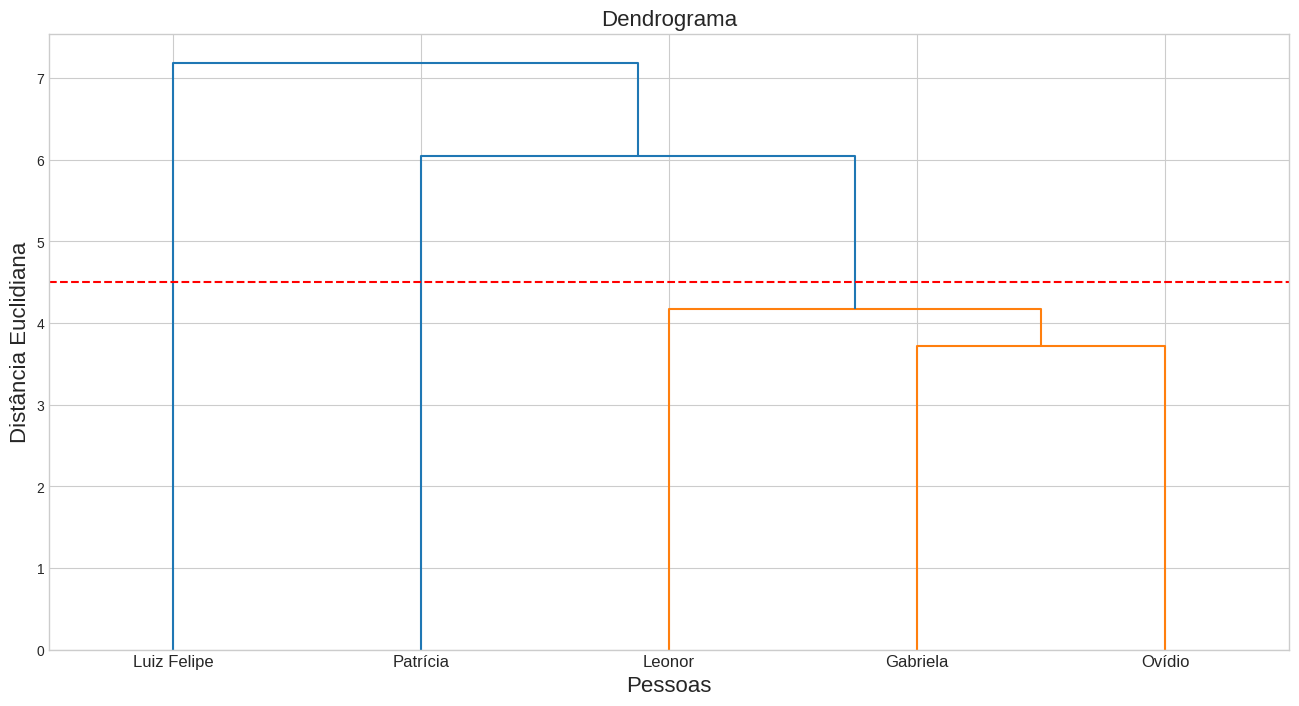

In [36]:
# Gerando o dendrograma 

## Inicialmente, vamos utilizar: 
## Distância euclidiana e método de encadeamento single linkgage

plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(sch.linkage(df.iloc[:, 1:], method = 'single', metric = 'euclidean'), labels = list(df.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation


In [53]:
# Gerando a variável com a indicação do cluster no dataset

## Deve ser realizada a parametrização:
    ## Número de clusters
    ## Medida de distância
    ## Método de encadeamento
    
## Como já observamos 3 clusters pelo dendrograma, vamos selecionar "3" clusters
## A medida de distância e o método de encadeamento são mantidos

cluster_sing = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single', compute_distances=True)
indica_cluster_sing = cluster_sing.fit_predict(df.iloc[:, 1:4])

# Retorna uma lista de valores com o cluster de cada observação

print(indica_cluster_sing, "\n")

df['cluster_single'] = indica_cluster_sing

print(df)

[0 1 2 0 0] 

     estudante  matemática  física  química  cluster_single  cluster_complete  \
0     Gabriela         3.7     2.7      9.1               0                 0   
1  Luiz Felipe         7.8     8.0      1.5               1                 2   
2     Patrícia         8.9     1.0      2.7               2                 1   
3       Ovídio         7.0     1.0      9.0               0                 0   
4       Leonor         3.4     2.0      5.0               0                 0   

   cluster_average  
0                0  
1                1  
2                2  
3                0  
4                0  


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [49]:
# Calcular a matriz de dissimilaridade

from sklearn.metrics import pairwise_distances

dist_matrix = pairwise_distances(df.iloc[:, 1:4], metric='euclidean')

print(dist_matrix)


[[ 0.         10.13212712  8.41961994  3.71348893  4.17013189]
 [10.13212712  0.          7.18679344 10.29028668  8.22253002]
 [ 8.41961994  7.18679344  0.          6.58027355  6.0448325 ]
 [ 3.71348893 10.29028668  6.58027355  0.          5.47357287]
 [ 4.17013189  8.22253002  6.0448325   5.47357287  0.        ]]


In [54]:
# As distâncias para as combinações em cada estágio
coeficientes = cluster_sing.distances_

print(coeficientes)

[3.71348893 4.17013189 6.0448325  7.18679344]


In [59]:
print(df.groupby('cluster_single').agg({'matemática': ['mean', 'std', 'min', 'max']}), '\n')
print(df.groupby('cluster_single').agg({'física': ['mean', 'std', 'min', 'max']}), '\n')
print(df.groupby('cluster_single').agg({'química': ['mean', 'std', 'min', 'max']}))

               matemática                    
                     mean       std  min  max
cluster_single                               
0                     4.7  1.997498  3.4  7.0
1                     7.8       NaN  7.8  7.8
2                     8.9       NaN  8.9  8.9 

               física                  
                 mean     std  min  max
cluster_single                         
0                 1.9  0.8544  1.0  2.7
1                 8.0     NaN  8.0  8.0
2                 1.0     NaN  1.0  1.0 

               química                    
                  mean       std  min  max
cluster_single                            
0                  7.7  2.338803  5.0  9.1
1                  1.5       NaN  1.5  1.5
2                  2.7       NaN  2.7  2.7


In [66]:
# Análise de variância de um fator (ANOVA). Interpretação do output:

## Mean Sq do cluster_H: indica a variabilidade entre grupos
## Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
## F value: estatística de teste (Sum Sq do cluster_H / Sum Sq dos Residuals)
## Pr(>F): p-valor da estatística 
## p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

## A variável mais discriminante dos grupos contém maior estatística F (e significativa)

from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA da variável 'matematica'
model = ols('matemática ~ C(cluster_single)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table = aov_table
print(aov_table, '\n')

# ANOVA da variável 'matematica'
model = ols('física ~ C(cluster_single)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table, '\n')

# ANOVA da variável 'matematica'
model = ols('química ~ C(cluster_single)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table, '\n')

                   sum_sq   df         F   PR(>F)
C(cluster_single)  16.592  2.0  2.079198  0.32476
Residual            7.980  2.0       NaN      NaN 

                   sum_sq   df          F   PR(>F)
C(cluster_single)  32.612  2.0  22.336986  0.04285
Residual            1.460  2.0        NaN      NaN 

                   sum_sq   df         F    PR(>F)
C(cluster_single)  38.352  2.0  3.505667  0.221943
Residual           10.940  2.0       NaN       NaN 



### - Complete e Average Linkage

In [43]:
# Comparando clusters resultantes por diferentes métodos de encadeamento

# Complete linkage

cluster_comp = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(df.iloc[:, 1:4])

print(indica_cluster_comp, "\n")

df['cluster_complete'] = indica_cluster_comp

print(df)

[0 2 1 0 0] 

     estudante  matemática  física  química  cluster_single  cluster_complete
0     Gabriela         3.7     2.7      9.1               0                 0
1  Luiz Felipe         7.8     8.0      1.5               1                 2
2     Patrícia         8.9     1.0      2.7               2                 1
3       Ovídio         7.0     1.0      9.0               0                 0
4       Leonor         3.4     2.0      5.0               0                 0


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [46]:
# Comparando clusters resultantes por diferentes métodos de encadeamento

# Average linkage

cluster_avg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(df.iloc[:, 1:4])

print(indica_cluster_avg, "\n")

df['cluster_average'] = indica_cluster_avg

print(df)

## Inclusive, poderiam ser alteradas as medidas de distância também

[0 1 2 0 0] 

     estudante  matemática  física  química  cluster_single  cluster_complete  \
0     Gabriela         3.7     2.7      9.1               0                 0   
1  Luiz Felipe         7.8     8.0      1.5               1                 2   
2     Patrícia         8.9     1.0      2.7               2                 1   
3       Ovídio         7.0     1.0      9.0               0                 0   
4       Leonor         3.4     2.0      5.0               0                 0   

   cluster_average  
0                0  
1                1  
2                2  
3                0  
4                0  


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## 1.3. Clusterização não-hierárquica KMeans

In [67]:
# Considerando que identificamos 3 possíveis clusters na análise hierárquica

kmeans = KMeans(n_clusters = 3, init = 'random').fit(df.iloc[:, 1:4])


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
#%% Para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_

print(kmeans_clusters)

df['cluster_kmeans'] = kmeans_clusters

print(df)


[2 1 0 2 2]
     estudante  matemática  física  química  cluster_single  cluster_complete  \
0     Gabriela         3.7     2.7      9.1               0                 0   
1  Luiz Felipe         7.8     8.0      1.5               1                 2   
2     Patrícia         8.9     1.0      2.7               2                 1   
3       Ovídio         7.0     1.0      9.0               0                 0   
4       Leonor         3.4     2.0      5.0               0                 0   

   cluster_average  cluster_kmeans  
0                0               2  
1                1               1  
2                2               0  
3                0               2  
4                0               2  


In [71]:
#%% Identificando as coordenadas centróides dos clusters finais

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = df.iloc[:, 1:4].columns
cent_finais.index.name = 'cluster'
print(cent_finais)


         matemática  física  química
cluster                             
0               8.9     1.0      2.7
1               7.8     8.0      1.5
2               4.7     1.9      7.7


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


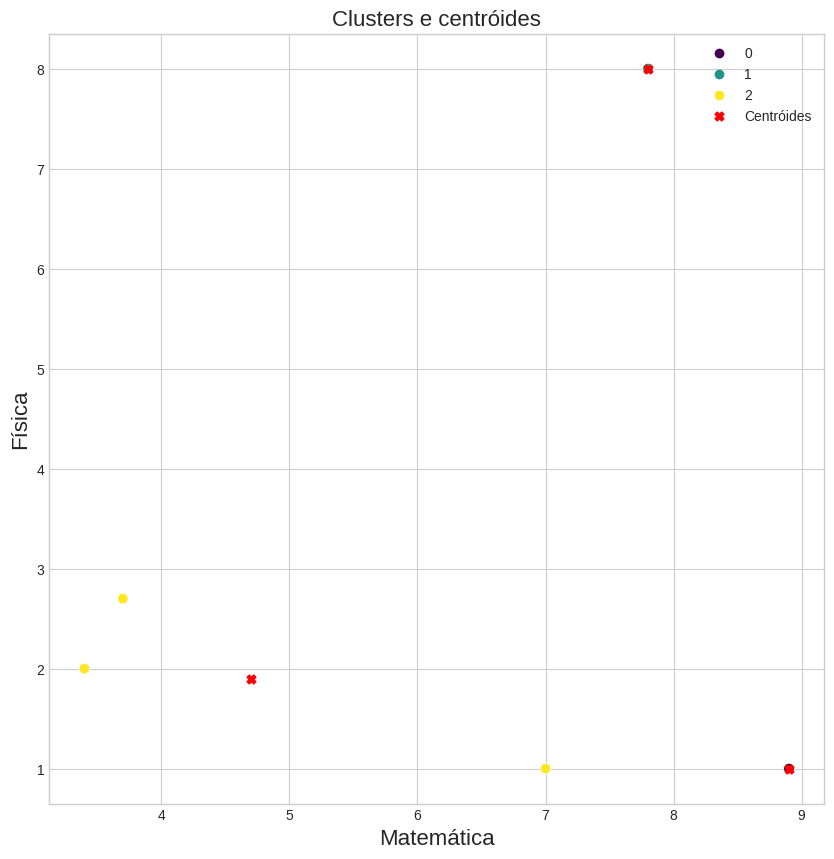

In [74]:
#%% Plotando as observações e seus centróides dos clusters

plt.figure(figsize=(10,10))

pred_y = kmeans.fit_predict(df.iloc[:, 1:4])
sns.scatterplot(x='matemática', y='física', data=df, hue='cluster_kmeans', palette='viridis', s=60)
plt.scatter(cent_finais['matemática'], cent_finais['física'], s = 40, c = 'red', label = 'Centróides', marker="X")
plt.title('Clusters e centróides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


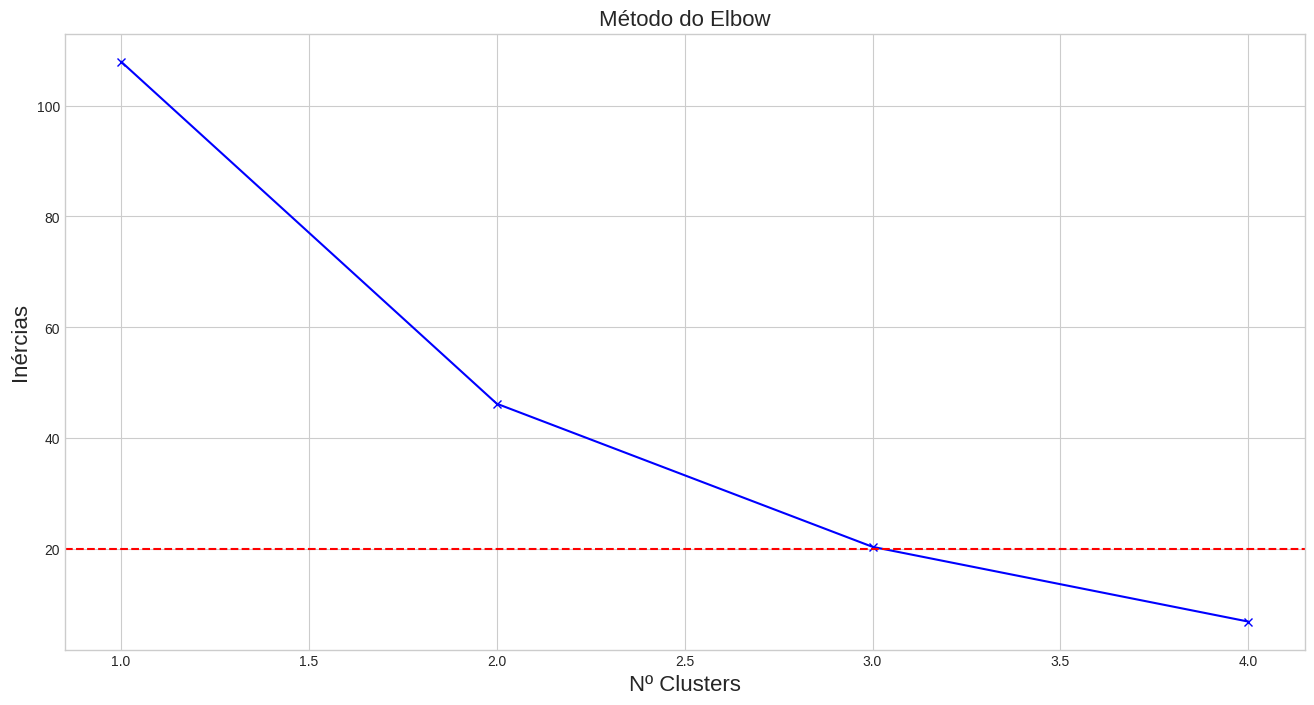

In [77]:
# Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "inércia": distância de cada obervação para o centróide de seu cluster
## Quanto mais próximos entre si e do centróide, menor a inércia

inercias = []
K = range(1,df.iloc[:, 1:4].shape[0])
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df.iloc[:, 1:4])
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
plt.axhline(y = 20, color = 'red', linestyle = '--')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Método do Elbow', fontsize=16)
plt.show()

# Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"

In [78]:
# Análise de variância de um fator (ANOVA). Interpretação do output:

## Mean Sq do cluster_H: indica a variabilidade entre grupos
## Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
## F value: estatística de teste (Sum Sq do cluster_H / Sum Sq dos Residuals)
## Pr(>F): p-valor da estatística 
## p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

## A variável mais discriminante dos grupos contém maior estatística F (e significativa)

from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA da variável 'matematica'
model = ols('matemática ~ C(cluster_kmeans)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table = aov_table
print(aov_table, '\n')

# ANOVA da variável 'matematica'
model = ols('física ~ C(cluster_kmeans)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table, '\n')

# ANOVA da variável 'matematica'
model = ols('química ~ C(cluster_kmeans)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table, '\n')

                   sum_sq   df         F   PR(>F)
C(cluster_kmeans)  16.592  2.0  2.079198  0.32476
Residual            7.980  2.0       NaN      NaN 

                   sum_sq   df          F   PR(>F)
C(cluster_kmeans)  32.612  2.0  22.336986  0.04285
Residual            1.460  2.0        NaN      NaN 

                   sum_sq   df         F    PR(>F)
C(cluster_kmeans)  38.352  2.0  3.505667  0.221943
Residual           10.940  2.0       NaN       NaN 



In [79]:
#%% Gráfico 3D dos clusters

import plotly.express as px 
import plotly.io as pio

pio.renderers.default='browser'

fig = px.scatter_3d(df, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    color='cluster_kmeans')
fig.show()